In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

f:\Users\Tahar\Anacondanew\envs\ztdl\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### The F and T tests

There is a question that is often asked: when should we use the F test and when should we use the T test?

- The F-test is only appropriate for testing that the slope differs from 0 (β1 ≠ 0).
- The t-test is used to test that the slope is positive (β1 > 0) or negative (β1 < 0). Note: the P-value calculated here is going to be for a two tail test

In [2]:
# link for dataset:
data = pd.read_csv('men200.csv',delimiter='\t') # load data

In [3]:
data.head()

,Year,Men200m
0,1900,22.2
1,1904,21.6
2,1908,22.6
3,1912,21.7
4,1920,22.0


In [4]:
data.describe()

,Year,Men200m
count,22.000000,22.000000
mean,1950.000000,20.805909
std,30.556739,0.914802
min,1900.000000,19.320000
25%,1925.000000,20.055000
50%,1954.000000,20.650000
75%,1975.000000,21.600000
max,1996.000000,22.600000


In [5]:
y= data.iloc[:,1] # target variable
X= data.iloc[:,0] # drop the target

In [6]:
X.shape, y.shape

((22,), (22,))

In [7]:
X = sm.add_constant(X) # add constant before fitting in statmodels

In [8]:
model = sm.OLS(y,X) # generate the model
results = model.fit() # fit the model

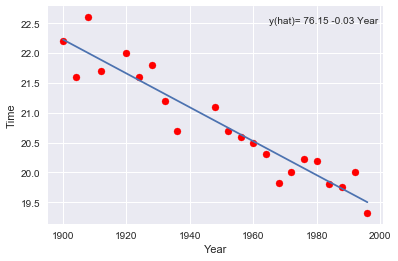

In [9]:
plt.scatter(X.iloc[:,1:],y, c='r')
plt.plot(X.iloc[:,1], X.iloc[:,1]*results.params[1]+results.params[0])
plt.text(1965,22.5,'y(hat)= '+str(round(results.params[0],2))+' '+str(round(results.params[1],2))+' Year')
plt.xlabel('Year')
plt.ylabel('Time')


In [10]:
print(results.summary()) # display summary of regression

                            OLS Regression Results                            
Dep. Variable:                Men200m   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     177.7
Date:                Sun, 10 Dec 2017   Prob (F-statistic):           2.07e-11
Time:                        18:51:32   Log-Likelihood:                -3.5436
No. Observations:                  22   AIC:                             11.09
Df Residuals:                      20   BIC:                             13.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.1534      4.152     18.340      0.0

In [37]:
print("The F value is %.2f for a p-value of %.5f"%(results.fvalue,results.f_pvalue))

The F value is 177.72 for a p-value of 0.00000


The p-value of F-test is lower than 0.01, thus, we reject the null hypothesis H0: β1 = 0 in favor of the alternative hypothesis HA: β1 ≠ 0. There is sufficient evidence at the α = 0.01 level to conclude that there is a linear relationship between year and winning time.

To test the direction of β1, it is necessary to divide the p-value by 2

In [45]:
print("The p-value/2 of β1 is %.5f, this suggests that there is sufficient evidence at the α = 0.01 level to conclude that β1 < 0"%(results.pvalues[1])) 

The p-value/2 of β1 is 0.00000, this suggests that there is sufficient evidence at the α = 0.01 level to conclude that β1 < 0
